In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('data/house.csv')

In [116]:
df1.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [117]:
df1.shape

(2226382, 12)

In [118]:
df1.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [278]:
df1.isnull().sum()

price             0
bed           14606
bath          17681
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
dtype: int64

In [3]:
df1.drop(['brokered_by', 'status', 'prev_sold_date'], axis=1, inplace=True)

In [4]:
df1.dropna(subset=['price', 'zip_code', 'state', 'house_size', 'acre_lot', 'city'], axis=0, inplace=True)

In [123]:
df1.shape

(1380967, 9)

In [124]:
df1.isnull().sum()

price             0
bed           14606
bath          17681
acre_lot          0
street         4116
city              0
state             0
zip_code          0
house_size        0
dtype: int64

In [5]:
df1.loc[:, 'house_size'] = df1['house_size'] * 0.09

In [6]:
df1.loc[:, 'acre_lot'] = df1['acre_lot'] * 4046.86

In [7]:
df1 = df1.sort_values(by=['state', 'city'])

In [8]:
df1.loc[:, 'street'] = df1['street'].ffill()

In [288]:
df1.isnull().sum()

price             0
bed           14606
bath          17681
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
dtype: int64

In [9]:
df1 = df1.copy()
df2 = df1[~(df1['bed'] * 1.62 + df1['bath'] * 3.33 > df1['house_size'])]

In [10]:
df2 = df2.copy()
df3 = df2[~(df2['price'] / df2['house_size'] < 550)]

In [11]:
big_house_bed = df3[df3['house_size'] > 900]['bed'].mode()[0]
big_house_bath = df3[df3['house_size'] > 900]['bath'].mode()[0]

average_bed = df3['bed'].mode()[0]
average_bath = df3['bath'].mode()[0]

In [12]:
def fill_bed(house_size):
    if house_size > 900:
        return big_house_bed
    else:
        return average_bed

In [13]:
def fill_bath(house_size):
    if house_size > 900:
        return big_house_bath
    else:
        return average_bath

In [14]:
df3.loc[:, 'bed'] = df3.apply(
    lambda df3_row: fill_bed(df3_row['house_size']) if pd.isnull(df3_row['bed']) else df3_row['bed'], axis=1)
df3.loc[:, 'bath'] = df3.apply(
    lambda df3_row: fill_bath(df3_row['house_size']) if pd.isnull(df3_row['bath']) else df3_row['bath'], axis=1)

<Axes: >

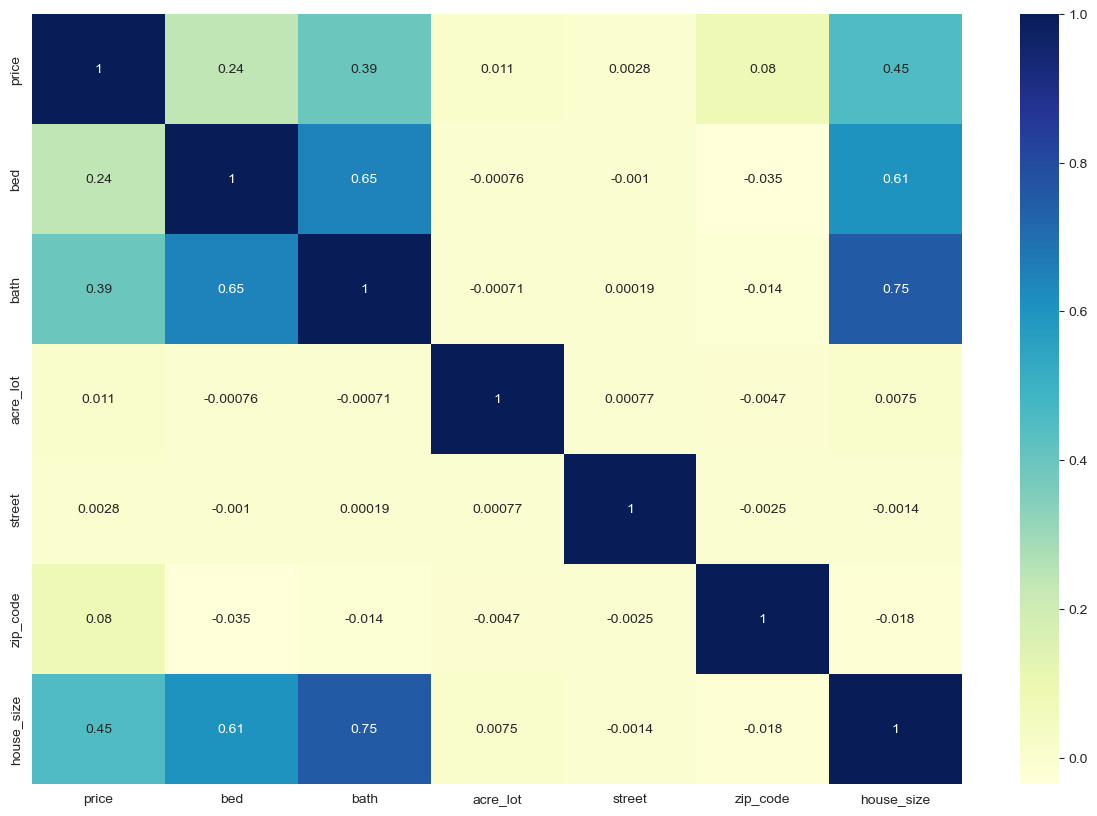

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df3.drop(['state', 'city'], axis=1).corr(), annot=True, cmap="YlGnBu")

In [16]:
df4 = df3.copy()
state_average_price = df4.groupby('state')['price'].mean()
df4.loc[:, 'state_average_price'] = df4['state'].map(state_average_price)

In [17]:
city_average_price = df4.groupby(['state', 'city'])['price'].mean()
df4['city_average_price'] = df4.apply(lambda df4_row: city_average_price.loc[df4_row['state'], df4_row['city']], axis=1)

In [18]:
df4.drop(['state', 'city'], axis=1, inplace=True)

In [19]:
from sklearn.model_selection import train_test_split

x = df4.drop('price', axis=1)
y = df4['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [25]:
reg.score(X_test, y_test)

0.4450352140374727

In [26]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.45501898, 0.43657781, 0.48466122, 0.26291484, 0.45781731])

In [276]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

In [277]:
rf.score(X_test, y_test)

0.5694205361730302